<a href='https://www.hexnbit.com/'> <img src='https://www.hexnbit.com/wp-content/uploads/2019/09/hexnbit_final_66px.png'/> </a>

### Task 1

Read and display "mall_customers.csv"

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
mall_data=pd.read_csv("mall_customers.csv")

In [4]:
mall_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Task 2

Perform Exploratory Data Analytics and mention atleast 2 inferences from the visualizations

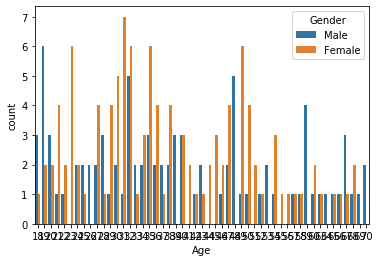

In [54]:
sns.countplot(x="Age",data=mall_data,hue="Gender")

### Task 3

Plot the Elbow Plot in  order to implement K-Means Clustering and write the value of selected K

In [29]:
x=mall_data.iloc[:, 3:]
x


,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3
...,...,...,...
195,120,79,2
196,126,28,4
197,126,74,2
198,137,18,4


In [30]:
mall_data.keys()

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Clusters'],
      dtype='object')

Text(0.5, 1.0, 'Elbow Plot')

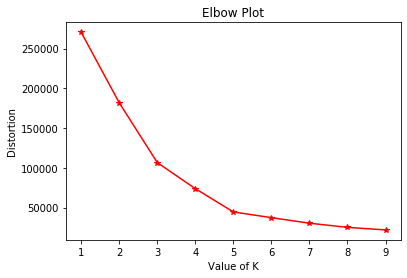

In [32]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)  
    kmeanModel.fit(x)                  
    distortions.append(kmeanModel.inertia_)   
plt.plot(K, distortions, 'r*-')
plt.xlabel('Value of K')
plt.ylabel('Distortion')
plt.title('Elbow Plot')

### Task 4

With selected K value, perform K-Means Clustering to cluster the customers

In [33]:
km = KMeans(n_clusters = 5, n_jobs = 4, random_state=101)

In [34]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [36]:
clusters=km.labels_
clusters

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 1, 4, 0, 4, 0, 4,
       1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4])

In [37]:
centers = km.cluster_centers_
centers


array([[ 8.82000000e+01,  1.71142857e+01,  4.00000000e+00],
       [ 5.52962963e+01,  4.95185185e+01, -1.33226763e-15],
       [ 2.57272727e+01,  7.93636364e+01,  1.00000000e+00],
       [ 2.63043478e+01,  2.09130435e+01,  3.00000000e+00],
       [ 8.65384615e+01,  8.21282051e+01,  2.00000000e+00]])

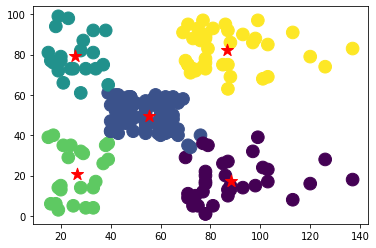

### Task 5

Add the predicted cluster labels to the main dataframe as a new column and display the complete dataframe

In [20]:
mall_data["Clusters"]=clusters

In [21]:
mall_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4


### Task 6

Create a scatter plot (Annual Income  vs Spending Score) and colour code the scatter plot as per the clustered customers<br>
**HINT :** df.plot.scatter

Text(0.5, 1.0, 'Scatter plot')

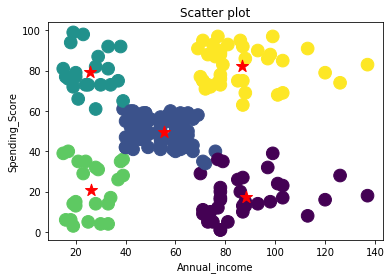

In [53]:

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=clusters, s=160)#plotting clusters
plt.scatter(centers[:,0],centers[:,1],marker="*",color="red",s=160)#centroids
plt.xlabel("Annual_income")
plt.ylabel("Spending_Score")
plt.title("Scatter plot")


### Task 7

Answer the following questions as per the scatter plot created above and as per your understanding of the topics:-<br>
Write the colour codes or cluster number from the above scatter plot in your answer

a) If you were a bank, who would you target for loan purpose?

b) If you were a bank which customers would you target to increase your revenue? 

c) If you're an e-commerce website which customers are ideal for you? 

a) We will mainly focus on the green points, because they have the low income and high expenses which tends them to take loan.

b) We will mainly focus on the green points, because they are getting the high income which increase the deposits in their bank leads to increase in revenue.

c)Here, we should focus on blue points,because many customers are found there.Also, the price must be optimal.